# 实验五 对PCA降维后的手写体数字图片数据分类

In [49]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from timeit import default_timer as timer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib
import numpy as np

## 载入训练数据

In [74]:
data_train = np.loadtxt(r"data/digits_training.csv",skiprows=1,delimiter=',')

### 查看前5行

In [51]:
data_train[:4,:]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.]])

### 查看数据集大小

In [52]:
data_train.shape[0]

5000

## 标准化训练数据

In [75]:
xTrain = data_train[:, 1:]
yTrain = data_train[:, 0]

In [76]:
def normalizeData(X): 
    return X - np.mean(X, axis=0)

In [77]:
xTrain=normalizeData(xTrain)

## 主成分分析

In [56]:
xTrain.shape

(5000, 784)

In [78]:
pca = PCA(n_components=xTrain.shape[1])

In [79]:
pca.fit(xTrain)

PCA(n_components=784)

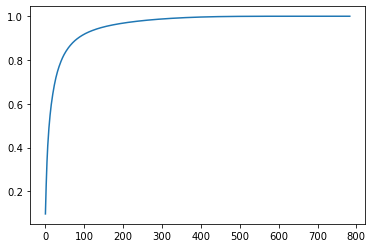

In [80]:
# 表示取前n个主成分能解释多少百分比的方差
plt.plot([i for i in range(xTrain.shape[1])],[np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(xTrain.shape[1])])
plt.show()

对于方差解释度既要顾忌准确程度，也要顾忌效率
大约在150左右的维度能达到95%以上（其实准确计算后发现149时达到95%）

## 使用PCA对数据降维，显示主成分个数

In [81]:
# 使用PCA对数据降维，取累计贡献率超过95%的前k个元素
pca = PCA(n_components=0.90)
pca.fit(xTrain)

PCA(n_components=0.9)

In [82]:
xTrain_re = pca.transform(xTrain)

In [83]:
xTrain_re.shape[1]

85

## 使用多层感知机对PCA降维后的数据训练分类模型

In [84]:
model = MLPClassifier(activation='relu',solver= "lbfgs" ,alpha=1e-6, hidden_layer_sizes=(200, 100, 50))
model.fit(xTrain_re,yTrain)

MLPClassifier(alpha=1e-06, hidden_layer_sizes=(200, 100, 50), solver='lbfgs')

## 保存分类模型为mlpNN_pca.m

In [85]:
joblib.dump(model, "output/mlpNN_pca.m")

['output/mlpNN_pca.m']

## 载入测试数据

In [86]:
data_test = np.loadtxt(r"data/digits_testing.csv",skiprows=1, delimiter=',')

### 查看前5行

In [66]:
data_test[:5,:]

array([[8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

### 查看数据集大小

In [67]:
data_test.shape[0]

500

## 标准化测试数据

In [87]:
xTest = data_test[:, 1:]
yTest = data_test[:, 0]

In [88]:
xTest = normalizeData(xTest)
xTest_re = pca.transform(xTest)

## 使用模型对测试集进行预测

### 载入模型

In [89]:
model2 = joblib.load("output/mlpNN_pca.m")

### 预测模型

In [90]:
pred = model2.predict(xTest_re)

### 打印错误数据

In [91]:
print("error data:",(pred != yTest).sum())

error data: 47


### 评价模型

In [92]:
print("accuracy_predict;",accuracy_score(yTest,pred))

accuracy_predict; 0.906
